### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [15]:
import numpy as np

m = np.arange(12).reshape((3,4))
print(m)

row_mean = np.sum(m, axis = 1)/m.shape[1]
print("Row mean: {}".format(row_mean))

column_mean = np.sum(m, axis = 0)/m.shape[0]
print("Column mean: {}".format(column_mean))

overall_mean = sum(m.flatten())/len(m.flatten())
print("Overall mean: {}".format(overall_mean))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Row mean: [1.5 5.5 9.5]
Column mean: [4. 5. 6. 7.]
Overall mean: 5.5


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [16]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

outp0 = np.outer(u,v)
print(outp0)

outp1 = np.array([[ u[i]*v[j] for j in range(len(v))] for i in range(len(u))])
print(outp1)

outp2 = np.tile(u,(4,1)).T * v
print(outp2)

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [17]:
size = (10,6)
matrix = np.random.random(size)
matrix[matrix<0.1] = 0
print(matrix)

[[0.47861792 0.202755   0.67443078 0.89159348 0.         0.        ]
 [0.88506881 0.88421882 0.18868167 0.83471517 0.73015522 0.12477571]
 [0.         0.         0.41232632 0.17360683 0.52553333 0.60480958]
 [0.10031034 0.59586939 0.81613061 0.43273403 0.6974715  0.91665704]
 [0.1533624  0.         0.43312133 0.26808732 0.96038111 0.21303069]
 [0.72023435 0.47691296 0.35248689 0.68947442 0.64828646 0.21591933]
 [0.9723732  0.         0.17570842 0.33847048 0.44490274 0.        ]
 [0.14812245 0.33673482 0.         0.77025152 0.47342227 0.85834516]
 [0.75095103 0.24576028 0.58384656 0.32988877 0.82035871 0.22047514]
 [0.         0.82134746 0.60540959 0.58278562 0.         0.8867837 ]]


4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

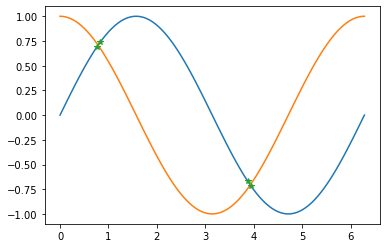

In [18]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
# print(x)

everyten = x[::10]
# print(everyten)

reverse = x[::-1]
# print(reverse)

absdiff = x[abs(np.sin(x)-np.cos(x)) < 0.1]
# print(absdiff)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))
plt.plot(absdiff, np.sin(absdiff), '*')

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [19]:
N = 10

nbyn = np.array([x*y for x in range(1,N+1) for y in range(1,N+1)]).reshape(N,N)
print(nbyn)

mask = np.fromfunction(lambda i,j: i+j==N-1 , (N,N))
antidiag = nbyn[mask]
print(antidiag)

mask = np.fromfunction(lambda i,j: i==j-1 , (N,N))
offsetdiag = nbyn[mask]
print(offsetdiag)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]
[10 18 24 28 30 30 28 24 18 10]
[ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [20]:
positions = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])

grid = np.tile(positions, (10,1)).T +positions

grid = (grid * 1.609344)

print(grid)

[[   0.        318.650112  487.631232 1184.477184 1401.738624 1890.9792
  2373.7824   2484.827136 3078.675072 3939.674112]
 [ 318.650112  637.300224  806.281344 1503.127296 1720.388736 2209.629312
  2692.432512 2803.477248 3397.325184 4258.324224]
 [ 487.631232  806.281344  975.262464 1672.108416 1889.369856 2378.610432
  2861.413632 2972.458368 3566.306304 4427.305344]
 [1184.477184 1503.127296 1672.108416 2368.954368 2586.215808 3075.456384
  3558.259584 3669.30432  4263.152256 5124.151296]
 [1401.738624 1720.388736 1889.369856 2586.215808 2803.477248 3292.717824
  3775.521024 3886.56576  4480.413696 5341.412736]
 [1890.9792   2209.629312 2378.610432 3075.456384 3292.717824 3781.9584
  4264.7616   4375.806336 4969.654272 5830.653312]
 [2373.7824   2692.432512 2861.413632 3558.259584 3775.521024 4264.7616
  4747.5648   4858.609536 5452.457472 6313.456512]
 [2484.827136 2803.477248 2972.458368 3669.30432  3886.56576  4375.806336
  4858.609536 4969.654272 5563.502208 6424.501248]
 [3078

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [21]:
N = 100

def primes(N):
    numbers = np.arange(N)
    mask = np.ones(N, dtype = bool)
    mask[:2] = 0

    for i in range(2, N):
        mask[i+1:] = np.logical_and(mask[i+1:], [numbers[i+1:] % i != 0])
    return numbers[mask]

def primes_sieve(N):
    numbers = np.arange(N)
    mask = np.ones(N, dtype = bool)
    mask[:2] = 0

    for i in range(2, int(np.sqrt(N))):
        mask[i+1:] = np.logical_and(mask[i+1:], [numbers[i+1:] % i != 0])
    return numbers[mask]


print(primes(N))

%timeit (primes(N))
%timeit (primes_sieve(N))

[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]
465 µs ± 10.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
48 µs ± 410 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

[[-1  1 -1 ...  1  1 -1]
 [-1  1 -1 ...  1  1  1]
 [ 1  1 -1 ...  1 -1  1]
 ...
 [ 1 -1  1 ... -1 -1  1]
 [-1  1  1 ...  1  1  1]
 [ 1  1 -1 ...  1 -1  1]]
The result is not what I expected but it is reasonable


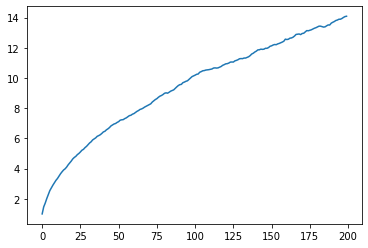

In [23]:
n_walkers = 1000
steps = 200

walkers = (np.round(np.random.random((n_walkers,steps))).astype(int))*2-1
print(walkers)

d = np.cumsum(walkers, axis = 1)

dsquared = np.power(d, 2)

mean_steps = np.average(dsquared, axis = 0)

avg_d = np.sqrt(mean_steps)

plt.plot(np.arange(200), avg_d)

print("The result is not what I expected but it is reasonable")

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

In [24]:
! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt

--2020-11-01 13:35:34--  https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.1, 2620:100:6025:1::a27d:4501
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3vigxoqayo389uc/populations.txt [following]
--2020-11-01 13:35:34--  https://www.dropbox.com/s/raw/3vigxoqayo389uc/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc26d1df9c2a6260d98cd140ea25.dl.dropboxusercontent.com/cd/0/inline/BCXiu82QeSAtDiK6CmuuDVCGZPUMDfKb1Un2fE6GzHhmtaBmyDy4BuF4-B8PZzgMSooewol7rUP74X_9MVcizTgMVLGGMWXEYkEugYOQnh-5Mg/file# [following]
--2020-11-01 13:35:34--  https://uc26d1df9c2a6260d98cd140ea25.dl.dropboxusercontent.com/cd/0/inline/BCXiu82QeSAtDiK6CmuuDVCGZPUMDfKb1Un2fE6GzHhmtaBmyDy4BuF4-B8PZzgM

Means hares, lynxes, carrots: [34080.95238095238, 20166.666666666668, 42400.0]
Stds hares, lynxes, carrots: [34080.95238095238, 20166.666666666668, 42400.0]
Correlation hares-lynxes: [1.494612e+10]
Correlation carrots-lynxes: [1.718454e+10]
Correlation hares-carrots: [3.032147e+10]
['carrots', 'carrots', 'hares', 'hares', 'lynxes', 'lynxes', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots', 'hares', 'hares', 'hares', 'lynxes', 'carrots', 'carrots', 'carrots', 'carrots', 'carrots']


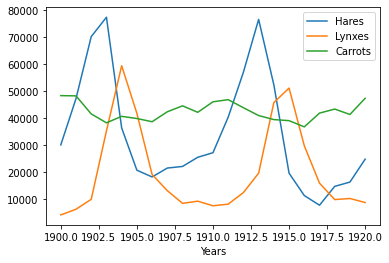

In [25]:
data = np.loadtxt("populations.txt")

years = data[:,0]
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]

plt.plot(years, hares)
plt.plot(years, lynxes)
plt.plot(years, carrots)
plt.legend(["Hares","Lynxes","Carrots"])
plt.xlabel("Years")

means = list(map((np.mean), [hares, lynxes, carrots]))
stds = list(map((np.std), [hares, lynxes, carrots]))
print("Means hares, lynxes, carrots: {}".format(means))
print("Stds hares, lynxes, carrots: {}".format(means))

corr0 = np.correlate(hares, lynxes)
corr1 = np.correlate(carrots, lynxes)
corr2 = np.correlate(hares, carrots)
print("Correlation hares-lynxes: " + str(corr0))
print("Correlation carrots-lynxes: " + str(corr1))
print("Correlation hares-carrots: " + str(corr2))

mask = np.argmax(data[:, 1:], axis = 1)
species = ["hares","lynxes","carrots"]
highest_population_year = [species[i] for i in mask]
print(highest_population_year)